<a href="https://colab.research.google.com/github/C-Lemia/Analise_Explorat-ria_dos_dados.ipynb/blob/main/Analise_Explorat%C3%B3ria_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analise Exploratória**

### Objetivo: Carregar uma base de dados, contém dados de filmes lançados ao longo do tempo, e fazer uma análise exploratória em cima dessa base, mostrando habilidades em python (pandas, numpy, sk-learn, matplotlib, etc) para tirar insights e conclusões analíticas.



In [ ]:
#Carregando as bibliotescas principais:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# Importanto aquivo para o Colab e a Biblioteca IO do Python
from google.colab import files

# Carregue o arquivo CSV
uploaded = files.upload()
# Obtenha o nome do arquivo
file_name = list(uploaded.keys())[0]



# Crie um DataFrame pandas a partir do conteúdo do arquivo
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')), header=None, names=['id', 'Title', 'Genre', 'Director', 'Actors', 'Year', 'Runtime', 'Rating', 'Votes', 'RevenueMillions', 'Metascore'])

# Exiba as 10 primeiras linhas do DataFrame
df.head(10)

Saving movies - Copia.csv to movies - Copia (5).csv


,id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,Id;Title;Genre;Director;Actors;Year;Runtime;Ra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1;Guardians of the Galaxy;Action,Adventure,Sci-Fi;James Gunn;Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana;2014;121;8.0;757074;333.0;76.0,NaN,NaN,NaN,NaN,NaN
2,2;Prometheus;Adventure,Mystery,Sci-Fi;Ridley Scott;Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron;2012;124;7.0;485820;126.0;65.0,NaN,NaN,NaN,NaN,NaN
3,3;Split;Horror,Thriller;M. Night Shyamalan;James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula;2016;117;7.0;157606;138.0;62.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4;Sing;Animation,Comedy,Family;Christophe Lourdelet;Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson;2016;108;7.0;60545;270.0;59.0,NaN,NaN,NaN,NaN,NaN
5,5;Suicide Squad;Action,Adventure,Fantasy;David Ayer;Will Smith,Jared Leto,Margot Robbie,Viola Davis;2016;123;6.0;393727;325.0;40.0,NaN,NaN,NaN,NaN,NaN
6,6;The Great Wall;Action,Adventure,Fantasy;Yimou Zhang;Matt Damon,Tian Jing,Willem Dafoe,Andy Lau;2016;103;6.0;56036;45.0;42.0,NaN,NaN,NaN,NaN,NaN
7,7;La La Land;Comedy,Drama,Music;Damien Chazelle;Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons;2016;128;8.0;258682;151.0;93.0,NaN,NaN,NaN,NaN,NaN
8,8;Mindhorn;Comedy;Sean Foley;Essie Davis,Andrea Riseborough,Julian Barratt,Kenneth Branagh;2016;89;6.0;2490;;71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9;The Lost City of Z;Action,Adventure,Biography;James Gray;Charlie Hunnam,Robert Pattinson,Sienna Miller,Tom Holland;2016;141;7.0;7188;8.0;78.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Verificando espaços NAN (Valores ausentes ou inconsistentes).
print(df.isnull().sum())


id                    0
Title                 1
Genre                 1
Director              1
Actors              106
Year                338
Runtime             998
Rating              999
Votes              1001
RevenueMillions    1001
Metascore          1001
dtype: int64


In [ ]:
# Verificando se as inconsistencias no NUM é por questões de pontuação.
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')), sep=';')


In [ ]:
#Verificando as 10 primeiras linhas do CSV.
df.head(10)

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.0,757074,333.0,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.0,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.0,157606,138.0,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.0,60545,270.0,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.0,393727,325.0,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.0,56036,45.0,42.0
6,7,La La Land,"Comedy,Drama,Music",Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.0,258682,151.0,93.0
7,8,Mindhorn,Comedy,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.0,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.0,7188,8.0,78.0
9,10,Passengers,"Adventure,Drama,Romance",Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.0,41.0


In [ ]:
# Verificando informações sobre os dados, Tipos de dados, uso da memória, e verificar valores null ( que já foram tratados anteriormente).
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1000 non-null   int64  
 1   Title            1000 non-null   object 
 2   Genre            1000 non-null   object 
 3   Director         1000 non-null   object 
 4   Actors           1000 non-null   object 
 5   Year             1000 non-null   int64  
 6   Runtime          1000 non-null   int64  
 7   Rating           1000 non-null   float64
 8   Votes            1000 non-null   int64  
 9   RevenueMillions  872 non-null    float64
 10  Metascore        936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB
None



Diretor mais pontuado: Barry Jenkins
Pontuação média: 99.00


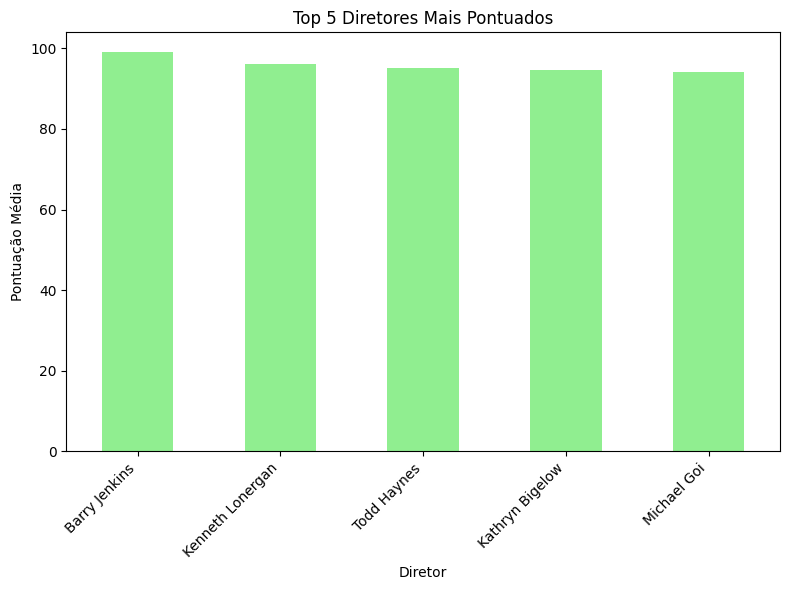

In [ ]:
# Cindo diretores mais bem pontuados.

# Calcular a média de pontuação por diretor
pontuacao_media_por_diretor = df.groupby('Director')['Metascore'].mean()

# Encontrar o diretor com a pontuação média mais alta
diretor_mais_pontuado = pontuacao_media_por_diretor.idxmax()
pontuacao_maxima = pontuacao_media_por_diretor.max()

# Exibir o diretor mais pontuado e sua pontuação média
print(f"\nDiretor mais pontuado: {diretor_mais_pontuado}")
print(f"Pontuação média: {pontuacao_maxima:.2f}")

top5_diretores = pontuacao_media_por_diretor.nlargest(5)
plt.figure(figsize=(8, 6))  # Ajuste o tamanho conforme necessário
top5_diretores.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Diretores Mais Pontuados')
plt.xlabel('Diretor')
plt.ylabel('Pontuação Média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



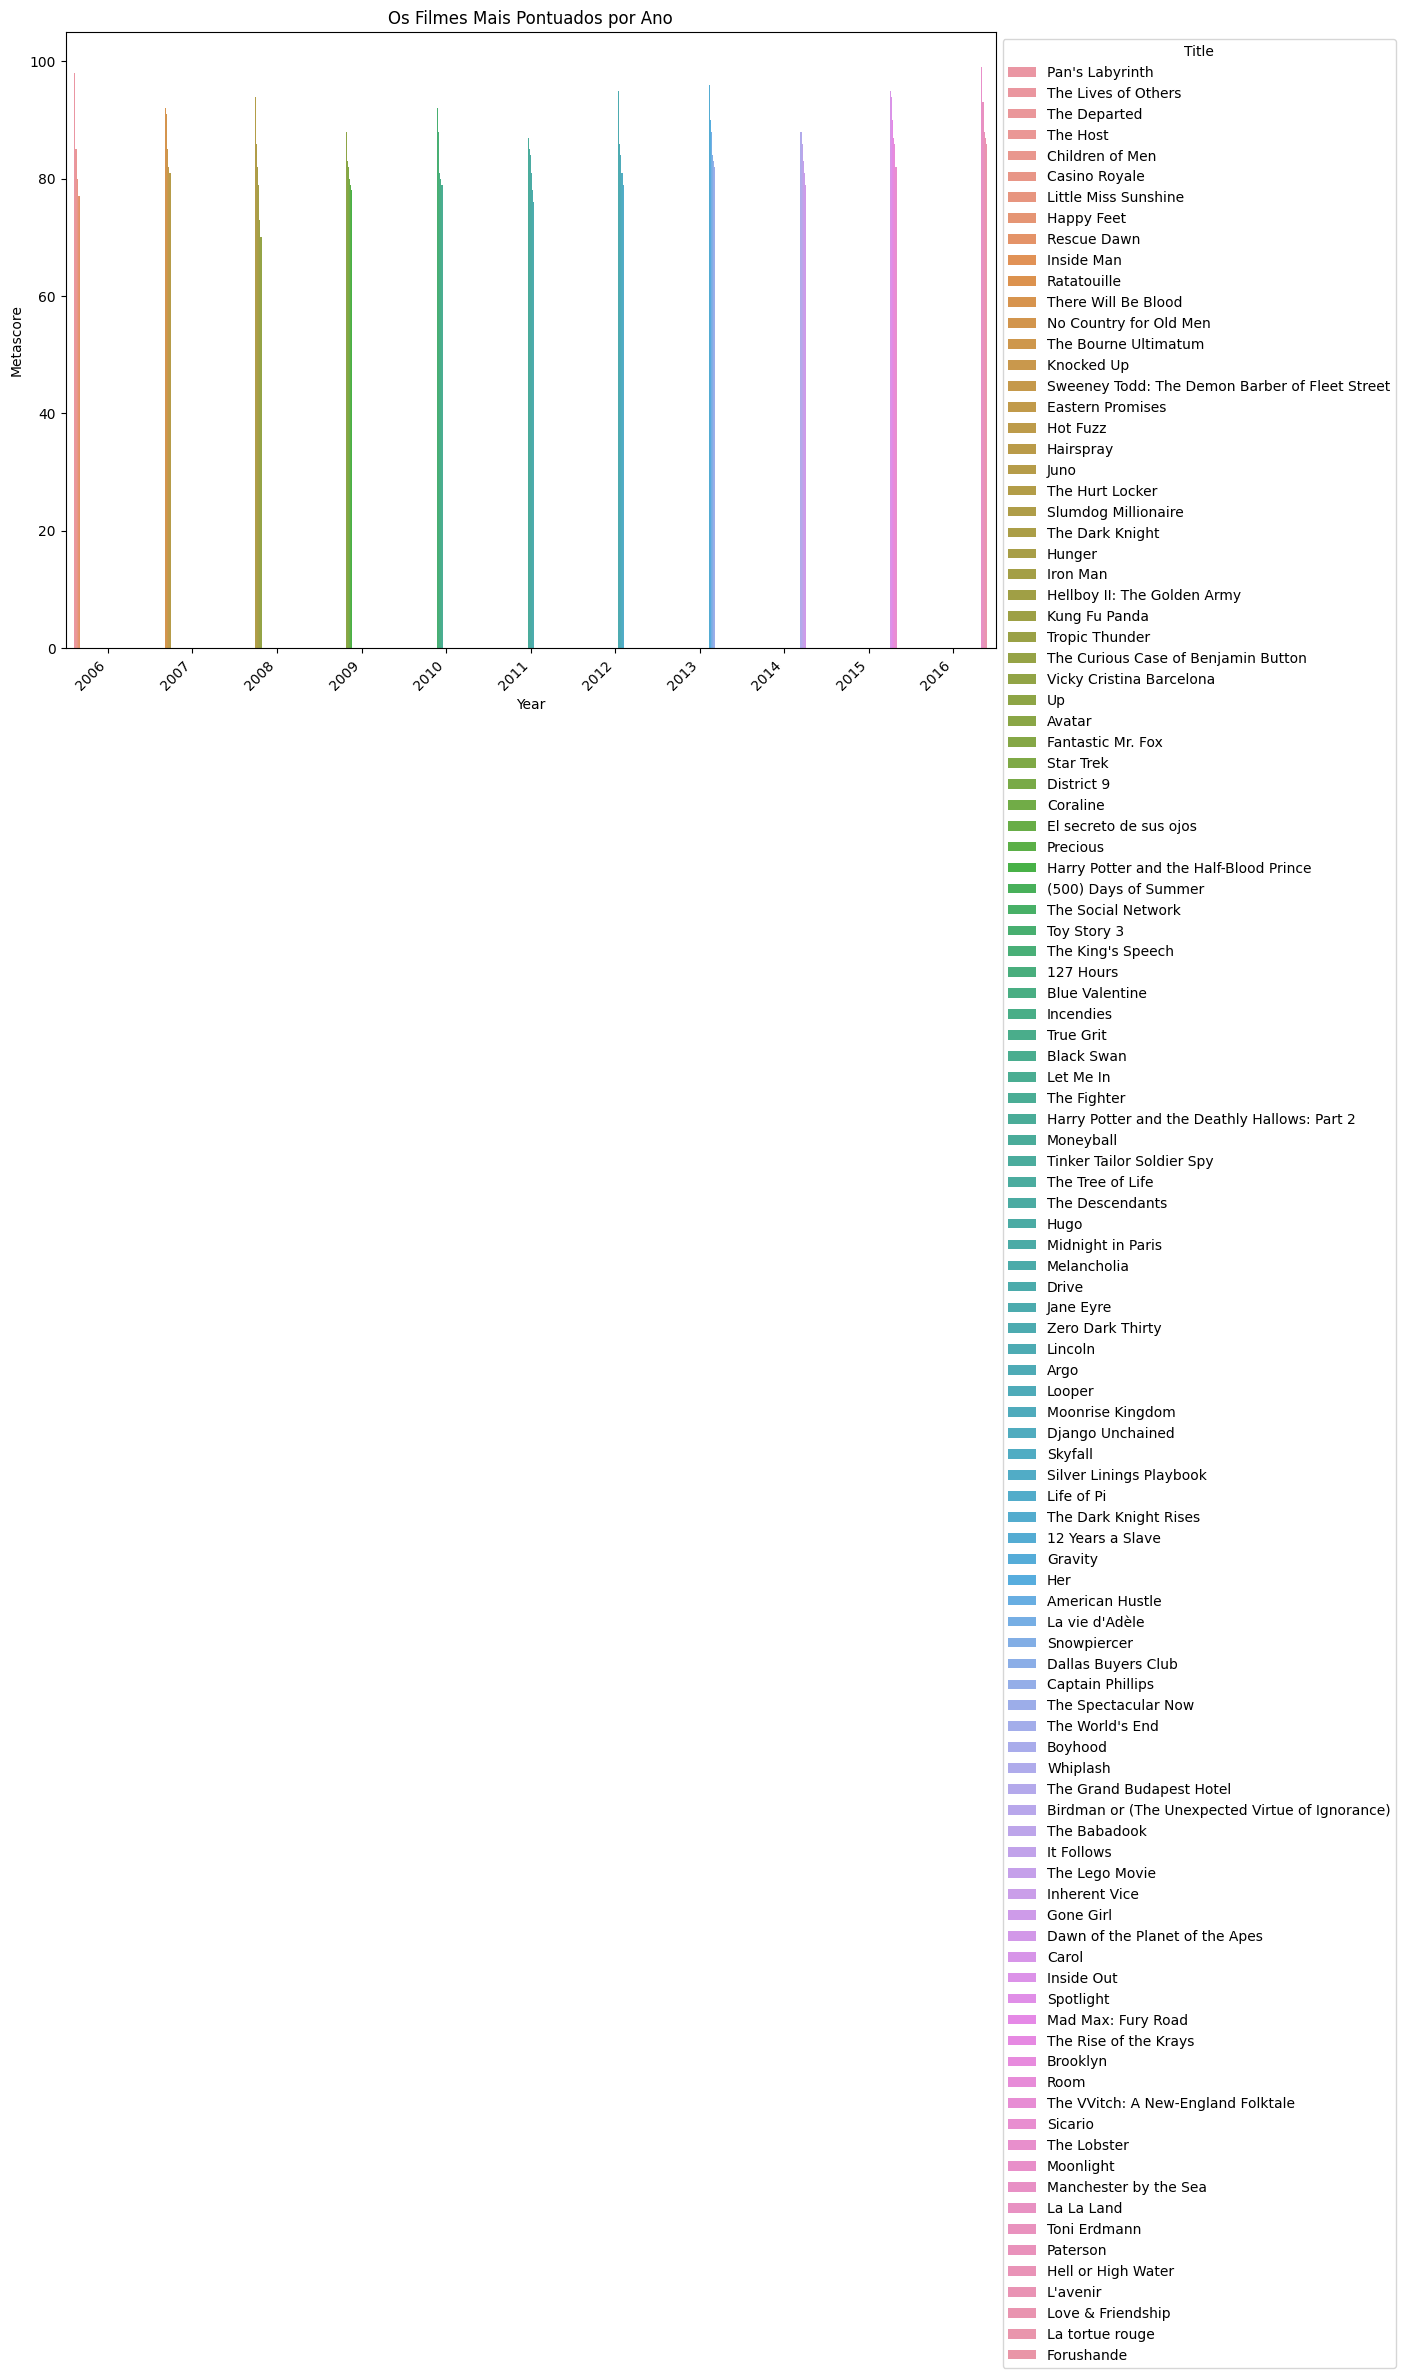

In [ ]:

# Filmes mais bem pontuados
film_metascore = df.groupby('Year').apply(lambda group: group.nlargest(10, 'Metascore')).reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Metascore', hue='Title', data=top_movies_by_year)
plt.title('Os Filmes Mais Pontuados por Ano')
plt.xlabel('Year')
plt.ylabel('Metascore')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Title', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
# Verificar qual a incidência de filmes pelo ano de lançamento.
ano_filme = df['Year'].value_counts()
ano_incidente = ano_filme.idxmax()
incidente = ano_filme.max()
print(f"O ano com mais incidência de filmes é {ano_incidente}, com {incidente} filmes.")



O ano com mais incidência de filmes é 2016, com 297 filmes.


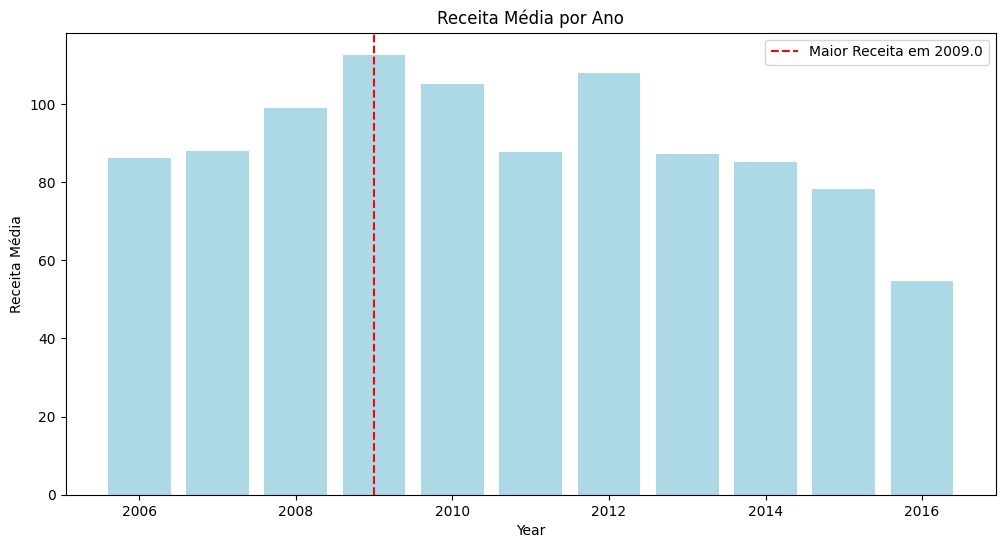

In [ ]:
#Verificar qual ano gerou maior receita.

receita = df.groupby('Year')['RevenueMillions'].mean().reset_index()
maior_receita = receita.loc[receita['RevenueMillions'].idxmax()]
plt.figure(figsize=(12, 6))
plt.bar(receita['Year'], receita['RevenueMillions'], color='lightblue')
plt.title('Receita Média por Ano')
plt.xlabel('Year')
plt.ylabel('Receita Média')
plt.axvline(x=maior_receita['Year'], color='red', linestyle='--', label=f'Maior Receita em {maior_receita["Year"]}')
plt.legend()


                          Genre  Year  RevenueMillions
0                        Action  2016            132.0
1              Action,Adventure  2007            337.0
2              Action,Adventure  2012            262.0
3              Action,Adventure  2014             73.0
4    Action,Adventure,Biography  2015             25.0
..                          ...   ...              ...
578             Sci-Fi,Thriller  2008             65.0
579                    Thriller  2007              0.0
580                    Thriller  2014              0.0
581                    Thriller  2016              0.0
582                Thriller,War  2016              0.0

[583 rows x 3 columns]
Action,Adventure,Sci-Fi


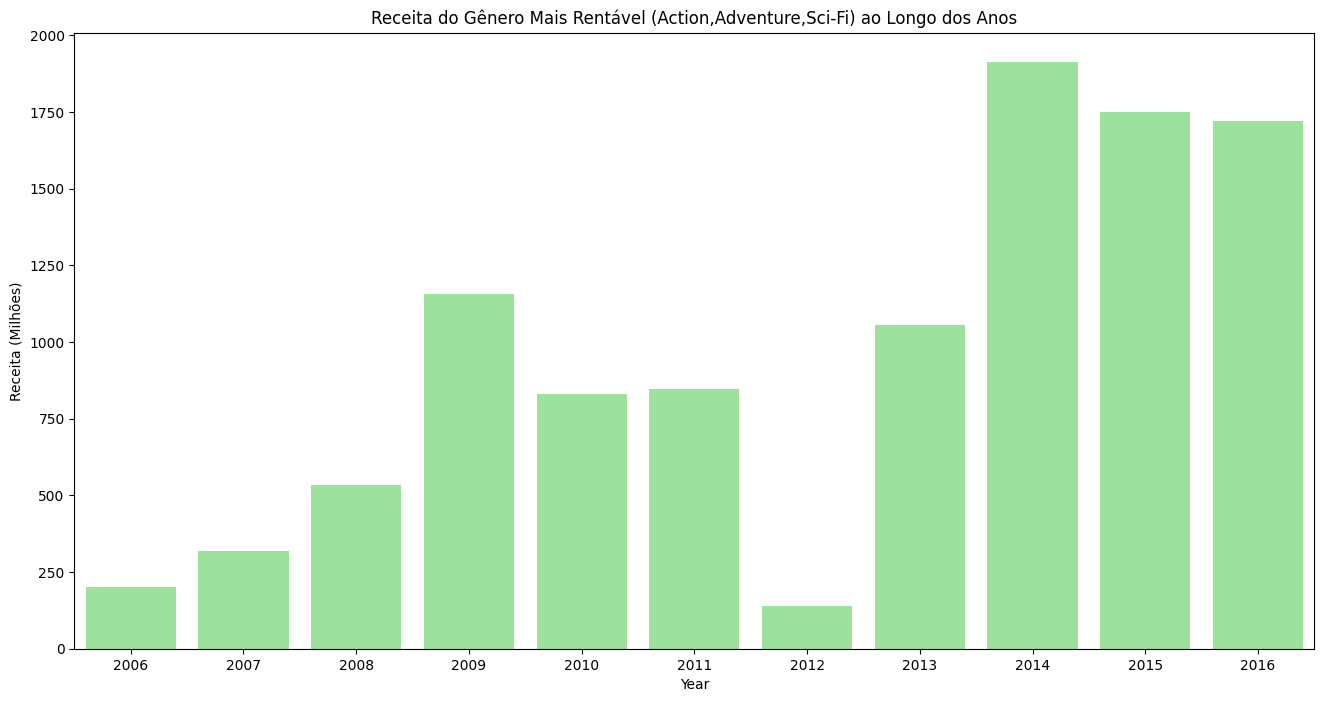

In [ ]:
# Verificar quais generos e em quais anos geraram mais receitas.

genre_revenue_by_year = df.groupby(['Genre', 'Year'])['RevenueMillions'].sum().reset_index()
print(genre_revenue_by_year)

most_profitable_genre = genre_revenue_by_year.groupby('Genre')['RevenueMillions'].sum().idxmax()
print(most_profitable_genre)


# Filtrar os dados para o gênero mais rentável
most_profitable_genre_data = genre_revenue_by_year[genre_revenue_by_year['Genre'] == most_profitable_genre]

# Visualização
plt.figure(figsize=(16, 8))
sns.barplot(x='Year', y='RevenueMillions', data=most_profitable_genre_data, color='lightgreen')
plt.title(f'Receita do Gênero Mais Rentável ({most_profitable_genre}) ao Longo dos Anos')
plt.xlabel('Year')
plt.ylabel('Receita (Milhões)')
plt.show()



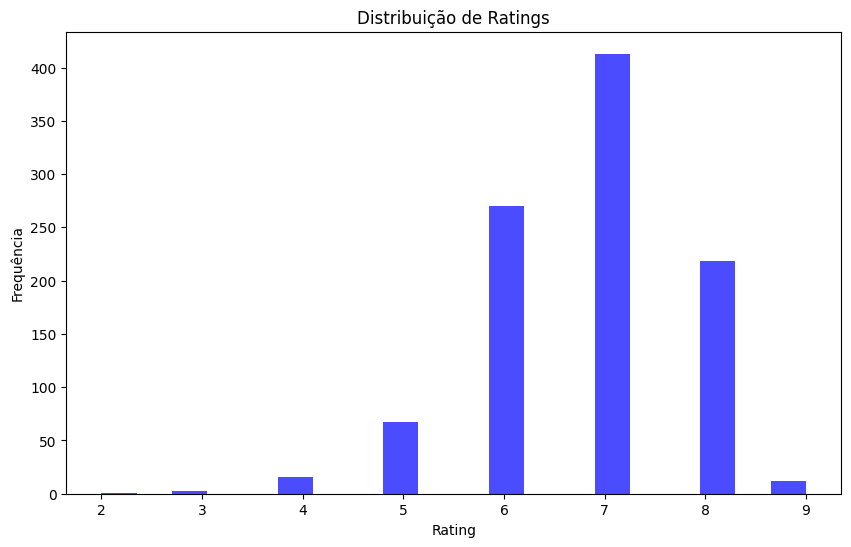

In [ ]:
# Quantidades de Rating:

plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=20, color='blue', alpha=0.7)
plt.title('Distribuição de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.show()


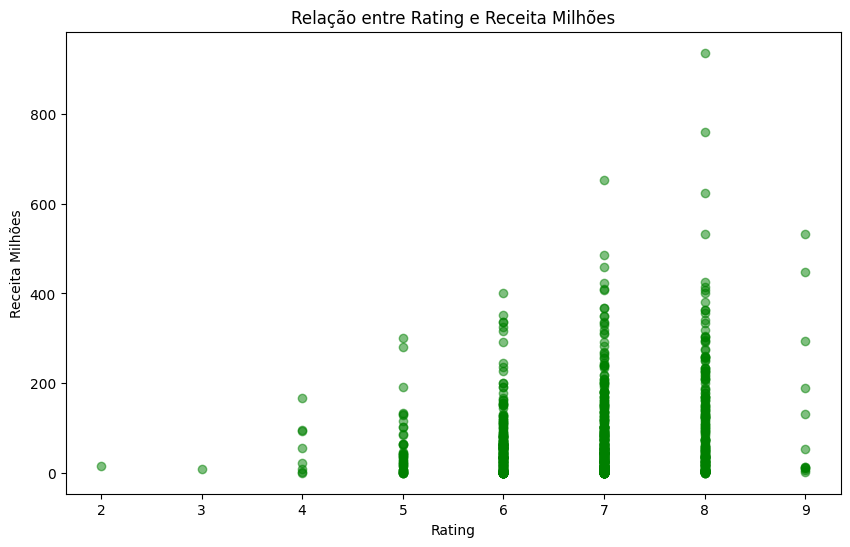

In [ ]:
# Relação entre Rating e Receita
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['RevenueMillions'], color='green', alpha=0.5)
plt.title('Relação entre Rating e Receita Milhões')
plt.xlabel('Rating')
plt.ylabel('Receita Milhões')
plt.show()